In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
import pathlib
data_dir = pathlib.Path("G:\PokemonData")

G:\PokemonData\onix\06941adc42384689bc8c2b2785106c06.jpg


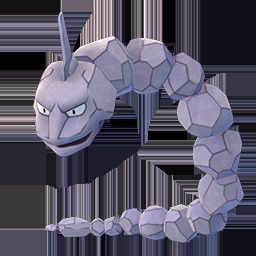

In [3]:
onix = list(data_dir.glob('onix/*'))
print(onix[0])
PIL.Image.open(str(onix[5]))

In [4]:
img_height, img_width=180, 180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6820 files belonging to 150 classes.
Using 5456 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6820 files belonging to 150 classes.
Using 1364 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Ni

In [11]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(180, 180, 3),
    pooling='avg',
    classes=150,
)

for layer in pretrained_model.layers:
    layer.trainable=False
    
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(150, activation='softmax'))

In [12]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_2 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 150)              307350    
 pper)                                                           
                                                                 
Total params: 23,895,062
Trainable params: 307,350
Non-trainable params: 23,587,712
_________________________________________________________________


In [13]:
resnet_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5
171/171 [==============================] - 681s 4s/step - loss: 2.9825 - accuracy: 0.3908 - val_loss: 1.5087 - val_accuracy: 0.6540
Epoch 2/5
171/171 [==============================] - 580s 3s/step - loss: 0.7442 - accuracy: 0.8492 - val_loss: 1.1913 - val_accuracy: 0.7067
Epoch 3/5
171/171 [==============================] - 541s 3s/step - loss: 0.3508 - accuracy: 0.9465 - val_loss: 1.0359 - val_accuracy: 0.7412
Epoch 4/5
171/171 [==============================] - 662s 4s/step - loss: 0.1852 - accuracy: 0.9819 - val_loss: 0.9939 - val_accuracy: 0.7441
Epoch 5/5
171/171 [==============================] - 719s 4s/step - loss: 0.1152 - accuracy: 0.9923 - val_loss: 0.9488 - val_accuracy: 0.7647


In [15]:
import cv2
image=cv2.imread(str(onix[5]))
image_resized=cv2.resize(image, (img_height, img_width))
image=np.expand_dims(image_resized, axis=0)
print(image.shape)

(1, 180, 180, 3)


In [16]:
pred=resnet_model.predict(image)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

1/1 [==============================] - 6s 6s/step
The predicted class is Onix
